In [1]:
from pymongo import MongoClient
import json
import collections
import string
import datetime
import pandas as pd
import matplotlib.pyplot as plt

client = MongoClient("mongodb://localhost:27017/")
db_name = "cmsproject"
db = client[db_name]

In [2]:
coll = db["users"]
a1 = pd.read_json('C://Users//ADMIN//customer_data1.json')
a2 = pd.read_json('C://Users//ADMIN//customer_data2.json')
a=a1.append(a2)
payload = json.loads(a.to_json(orient='records'))
coll.remove()
coll.insert(payload)

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  import sys


[ObjectId('619a0a9e5f49a21b0aef91f1'),
 ObjectId('619a0a9e5f49a21b0aef91f2'),
 ObjectId('619a0a9e5f49a21b0aef91f3'),
 ObjectId('619a0a9e5f49a21b0aef91f4'),
 ObjectId('619a0a9e5f49a21b0aef91f5'),
 ObjectId('619a0a9e5f49a21b0aef91f6'),
 ObjectId('619a0a9e5f49a21b0aef91f7'),
 ObjectId('619a0a9e5f49a21b0aef91f8'),
 ObjectId('619a0a9e5f49a21b0aef91f9'),
 ObjectId('619a0a9e5f49a21b0aef91fa'),
 ObjectId('619a0a9e5f49a21b0aef91fb'),
 ObjectId('619a0a9e5f49a21b0aef91fc'),
 ObjectId('619a0a9e5f49a21b0aef91fd'),
 ObjectId('619a0a9e5f49a21b0aef91fe'),
 ObjectId('619a0a9e5f49a21b0aef91ff'),
 ObjectId('619a0a9e5f49a21b0aef9200'),
 ObjectId('619a0a9e5f49a21b0aef9201'),
 ObjectId('619a0a9e5f49a21b0aef9202'),
 ObjectId('619a0a9e5f49a21b0aef9203'),
 ObjectId('619a0a9e5f49a21b0aef9204'),
 ObjectId('619a0a9e5f49a21b0aef9205'),
 ObjectId('619a0a9e5f49a21b0aef9206'),
 ObjectId('619a0a9e5f49a21b0aef9207'),
 ObjectId('619a0a9e5f49a21b0aef9208'),
 ObjectId('619a0a9e5f49a21b0aef9209'),
 ObjectId('619a0a9e5f49a2

In [3]:
coll.find_one()

{'_id': ObjectId('619a0a9e5f49a21b0aef91f1'),
 'first_name': 'Gray',
 'last_name': "O'Conor",
 'email': 'goconor0@rediff.com',
 'password': '8DkfPKZ',
 'age': 78,
 'country': 'Brazil',
 'gender': 'Genderfluid',
 'occupation': 'Compensation Analyst',
 'language preferred': 'Azeri'}

In [4]:
alldata=a.to_dict(orient="records")
alldata

[{'first_name': 'Gray',
  'last_name': "O'Conor",
  'email': 'goconor0@rediff.com',
  'password': '8DkfPKZ',
  'age': 78,
  'country': 'Brazil',
  'gender': 'Genderfluid',
  'occupation': 'Compensation Analyst',
  'language preferred': 'Azeri'},
 {'first_name': 'Willamina',
  'last_name': 'Gorgl',
  'email': 'wgorgl1@blinklist.com',
  'password': 'YiraibmmKnTx',
  'age': 31,
  'country': 'Indonesia',
  'gender': 'Male',
  'occupation': 'VP Sales',
  'language preferred': 'Kashmiri'},
 {'first_name': 'Cornelia',
  'last_name': 'Saywell',
  'email': 'csaywell2@soundcloud.com',
  'password': 'WR1MBaDP8vj',
  'age': 75,
  'country': 'Indonesia',
  'gender': 'Agender',
  'occupation': 'Developer III',
  'language preferred': 'Macedonian'},
 {'first_name': 'Tamera',
  'last_name': 'Eastridge',
  'email': 'teastridge3@ning.com',
  'password': 'GqvFXI',
  'age': 80,
  'country': 'Philippines',
  'gender': 'Genderqueer',
  'occupation': 'Civil Engineer',
  'language preferred': 'Dari'},
 {'firs

In [5]:
#What percentage of people are below the age of 40?
(coll.count_documents({'age':{"$lt":40.0}})/coll.count_documents({}))*100

40.35

In [6]:
#What percentage of people are above the age of 40?
(coll.count_documents({'age':{"$gte":40.0}})/coll.count_documents({}))*100

59.650000000000006

From the above, we can conclude that most of the users belong to the middle aged or senior citizen category

In [7]:
#What are the top 3 most countries that the users are from?
cursor = coll.aggregate([
    { "$group": {
        "_id": "$country",
        "count": { "$sum": 1 }
    }},
    { "$sort": { "count" : -1} }
])
data = list(cursor)
for i in range(2):
    print(data[i])

{'_id': 'China', 'count': 384}
{'_id': 'Indonesia', 'count': 187}


From the above, we can conclude that most of the users are from Asian countries

In [8]:
#What are the top 3 most user's occupation
cursor = coll.aggregate([
    { "$group": {
        "_id": "$occupation",
        "count": { "$sum": 1 }
    }},
    { "$sort": { "count" : -1} }
])
data = list(cursor)
for i in range(3):
    print(data[i])

{'_id': 'Graphic Designer', 'count': 31}
{'_id': 'Staff Scientist', 'count': 30}
{'_id': 'Analog Circuit Design manager', 'count': 26}


There is nothing in particular that can be concluded from the above analysis

In [9]:
#What are the top 3 most common age groups of the users?
cursor = coll.aggregate([
    { "$group": {
        "_id": "$age",
        "count": { "$sum": 1 }
    }},
    { "$sort": { "count" : -1} }
])
data = list(cursor)
for i in range(5):
    print(data[i])

{'_id': 60, 'count': 44}
{'_id': 28, 'count': 44}
{'_id': 78, 'count': 40}
{'_id': 80, 'count': 39}
{'_id': 30, 'count': 39}


In [10]:
ages = [44, 44, 40, 39, 39]

# find avg of all ages
avg = sum(ages)/5
print(avg)

41.2


The average age of the users is 41.2

In [11]:
#What are the top 3 most preferred languages of the users?
cursor = coll.aggregate([
    { "$group": {
        "_id": "$language preferred",
        "count": { "$sum": 1 }
    }},
    { "$sort": { "count" : -1} }
])
data = list(cursor)
for i in range(5):
    print(data[i])

{'_id': 'Kannada', 'count': 31}
{'_id': 'Burmese', 'count': 29}
{'_id': 'Indonesian', 'count': 28}
{'_id': 'Gagauz', 'count': 27}
{'_id': 'Hiri Motu', 'count': 27}


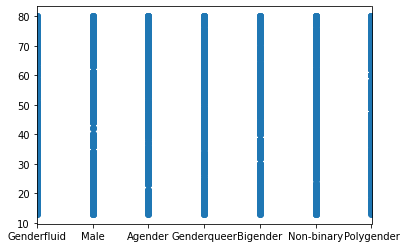

In [20]:
plt.xlim([0,6])

#plt.plot('gender','age',data=a)
plt.scatter('gender','age',data=a)

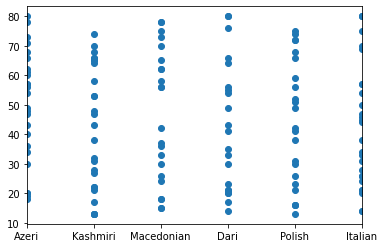

In [15]:
plt.xlim([0,5])

plt.scatter('language preferred','age',data=a)

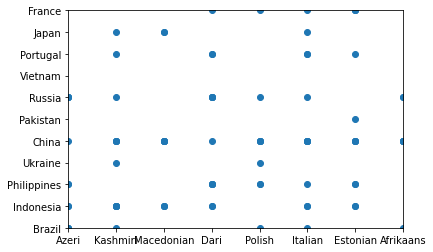

In [18]:
plt.xlim([0,7])
plt.ylim([0,10])
plt.scatter('language preferred','country',data=a)